# Machine Learning - Supervised Methods
# The Learning Problem

## 1. Data Handling

* **a) Load the "banana" data set provided in the moodle course and load the data file into scikit-learn as follows:**

In [1]:
import numpy as np

def loadCSV(filename):
    f = open(filename)
    data = np.loadtxt(f, delimiter=',')
    X = data[:, 1:]
    y = data[:, 0]
    return X, y

X, y = loadCSV("banana.csv")

**Output the number $N$ of data points and the dimension $d$ of the input space $X = \mathbb{R}^d$. Which label space $Y$ does this classification problem use? **

In [2]:
N = X.shape[0]
d = X.shape[1]
print("number of data points: " + str(N))
print("number of dimensions: " + str(d))
print(y)

number of data points: 5300
number of dimensions: 2
[-1.  1.  1. ... -1. -1. -1.]


As can be seen from the output of print(y), the label space is $Y = \{-1, +1\}$.

* **b) Create a numpy array of predictions according to the rule
$$ \hat y = h(x) = \begin{cases}
					+1 & \text{if } x_1 \leq 0 \\
					-1 & \text{if } x_1 > 0 \\
				\end{cases} $$
Compute the error rate, implemented by *sklearn.metrics.zero_one_loss*.**

In [3]:
import sklearn.metrics
predictions = np.zeros(N)
for i in range(N):
    predictions[i] = +1 if X[i,1] <= 0 else -1
errorrate = sklearn.metrics.zero_one_loss(predictions, y)
print("error rate: " + str(errorrate) + " (" + str(100 * errorrate) + " %)")

error rate: 0.4324528301886792 (43.24528301886792 %)


## 2. The Perceptron (Implementation)

* **a) Load the "workers" data set provided in the moodle course. It consists of two files for inputs and labels/targets, which can be loaded with the function *numpy.load*. Print number of data points and the shape of of the input vectors.**

In [97]:
import numpy as np

X = np.load("workers_x.npy")
y = np.load("workers_y.npy")
print("number of data points: " + str(X.shape[0]))
print("shape of input data:"  + str(X.shape))

number of data points: 452
shape of input data:(452, 100, 200, 3)


* **b) The input vectors are actually RGB images with resolution $200 \times 100$, making for a total of $200 \cdot 100 \cdot 3 = 60000$ numbers (features) per images. The task is to classify the images into two categories: images with and without construction workers. This information is used to improve safety when operating large construction machines. Display a few images using the following function to get an impression of the task.**

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
def showimage(x):
    plt.imshow(x)
    plt.show()

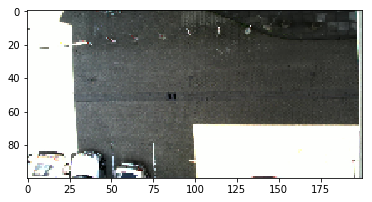

label=-1


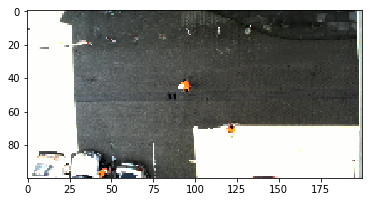

label=1


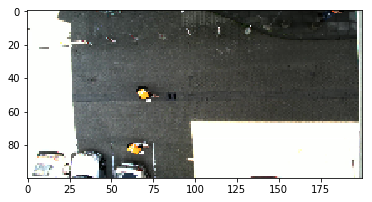

label=1


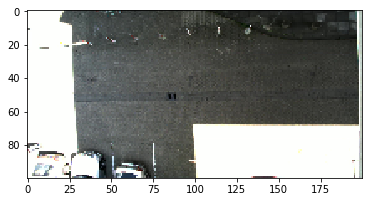

label=-1


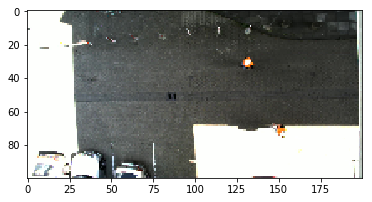

label=1


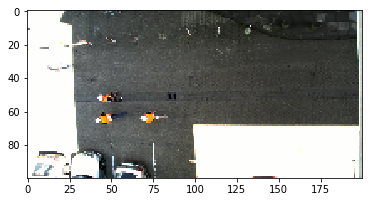

label=1


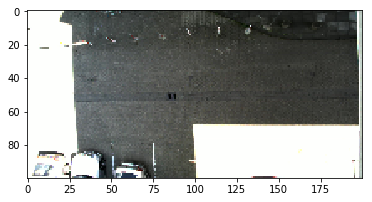

label=-1


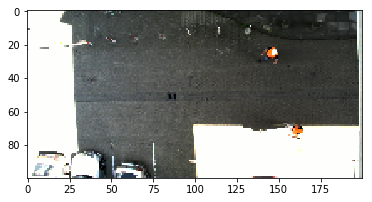

label=1


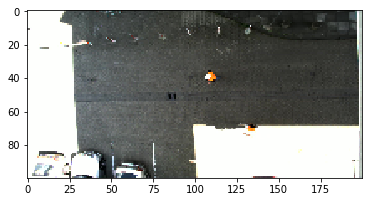

label=1


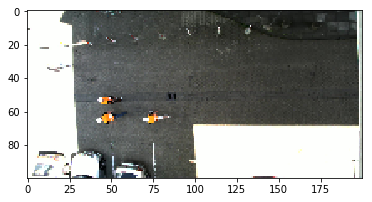

label=1


In [99]:
for i in range(10):
    j = np.random.randint(X.shape[0])
    showimage(X[j])
    print("label=" + str(y[j]))

* **c) Reshape the data so that all 60000 features form a "flat" vector. Afterwards the data should be a two-dimensional array.**

In [100]:
X = X.reshape(-1, 60000)
print(X.shape)

(452, 60000)


* **d) Implement the Perceptron algorithm, which works as follows:**

infinite loop:<br/>
&nbsp; &nbsp; find index $i \in \{1, \dots, N\}$ such that $y_i \cdot w^T x_i \leq 0$<br/>
&nbsp; &nbsp; if no such index exists then stop<br/>
&nbsp; &nbsp; update weight vector: $w \leftarrow w + y_i \cdot x_i$

In [101]:
import sys
def train_perceptron(X, y):
    N = X.shape[0]
    d = X.shape[1]
    w = np.zeros(d)
    w0 = 0.0
    iter = 0
    sys.stdout.write("training on " + str(N) + " points ")
    while True:
        # progress output
        iter += 1
        if iter % 100 == 0:
            sys.stdout.write(".")
            sys.stdout.flush()
        # find a wrongly classified point
        found = False
        for i in range(N):
            if y[i] * (w0 + np.dot(w, X[i])) <= 0:
                found = True
                break
        # stop if there is no such point
        if not found:
            break
        # update the weight vector
        w0 += y[i]
        w += y[i] * X[i]
    print("finished in " + str(iter) + " iterations")
    return w0, w

* **e) Test the perceptron on the following toy data. It should give a solution close to some positive multiple of $w = (1, 0)$ and $w_0 = -1$.**

In [102]:
X_dummy = np.array([[0.99, -1], [1.01, -1], [0.99, 1], [1.01, 1]])
y_dummy = np.array([-1,+1,-1,+1])

In [103]:
w0, w = train_perceptron(X_dummy, y_dummy)
print("w0: " + str(w0))
print("w: " + str(w))

training on 4 points ....finished in 401 iterations
w0: -2.0
w: [2. 0.]


* **f) Split the worker data into two equal halves. Train the on the first half of the data. Make predictions on the second half and count the number of wrongly predicted labels. Output the error rate. Comment on the quality of the classifier - do you expect it to be useful for the task at hand? **

In [104]:
N = X.shape[0]
X_train = X[:N//2]
y_train = y[:N//2]
X_test = X[N//2:]
y_test = y[N//2:]

w0, w = train_perceptron(X_train, y_train)
errors = 0
for i in range(X_test.shape[0]):
    if y_test[i] * (w0 + np.dot(w, X_test[i, :])) <= 0:
        errors += 1
print("error rate: " + str(errors / X_test.shape[0]))

training on 226 points ....finished in 495 iterations
error rate: 0.01327433628318584


The error rate of 1.3% is quite low, therefore the classifier is definitly useful. Furthermore, it is based on single images. When doing some temporal consistency checks in a video then it should be possible to reduce the error rate even further. Note that the error rate can be a bit different depending on implementation details.

## 3. The Perceptron (Concepts)

** We can measure the "quality" of the prediction of the perceptron by $y_i \cdot w^T x_i$: the prediction is correct if and only if this value is positive.**

* **a) Updating the weight vector with a labeled point $(x_i, y_i)$ improves the prediction for that point. By which amount is the value of the linear function improved?**

The improvement is
$$ y_i \cdot (w + y_i x_i)^T x_i - y_i \cdot w^T x_i = y_i \cdot (y_i x_i)^T x_i = y_i^2 x_i^T x_i = \|x_i\|^2 \geq 0 $$

* **b) What happens to $w^T x_j$ when updating $w$ with $(x_i, y_i)$, i.e., with a different point? Does the prediction of $(x_j, y_j)$ necessarily improve?**

The quality changes as follows:
$$ y_j \cdot (w + y_i x_i)^T - y_j \cdot w^T x_j = y_i y_j \cdot x_i^T x_j $$
This term may be positive or negative, so the quality may improve or decay.

* **c) What happens if the perceptron is run on data that is not linearly separable?**

The algorithm is caught in an infinite loop, since no matter which weight vector it currently considers, there is always a wrongly classified point - otherwise the data would be separable.